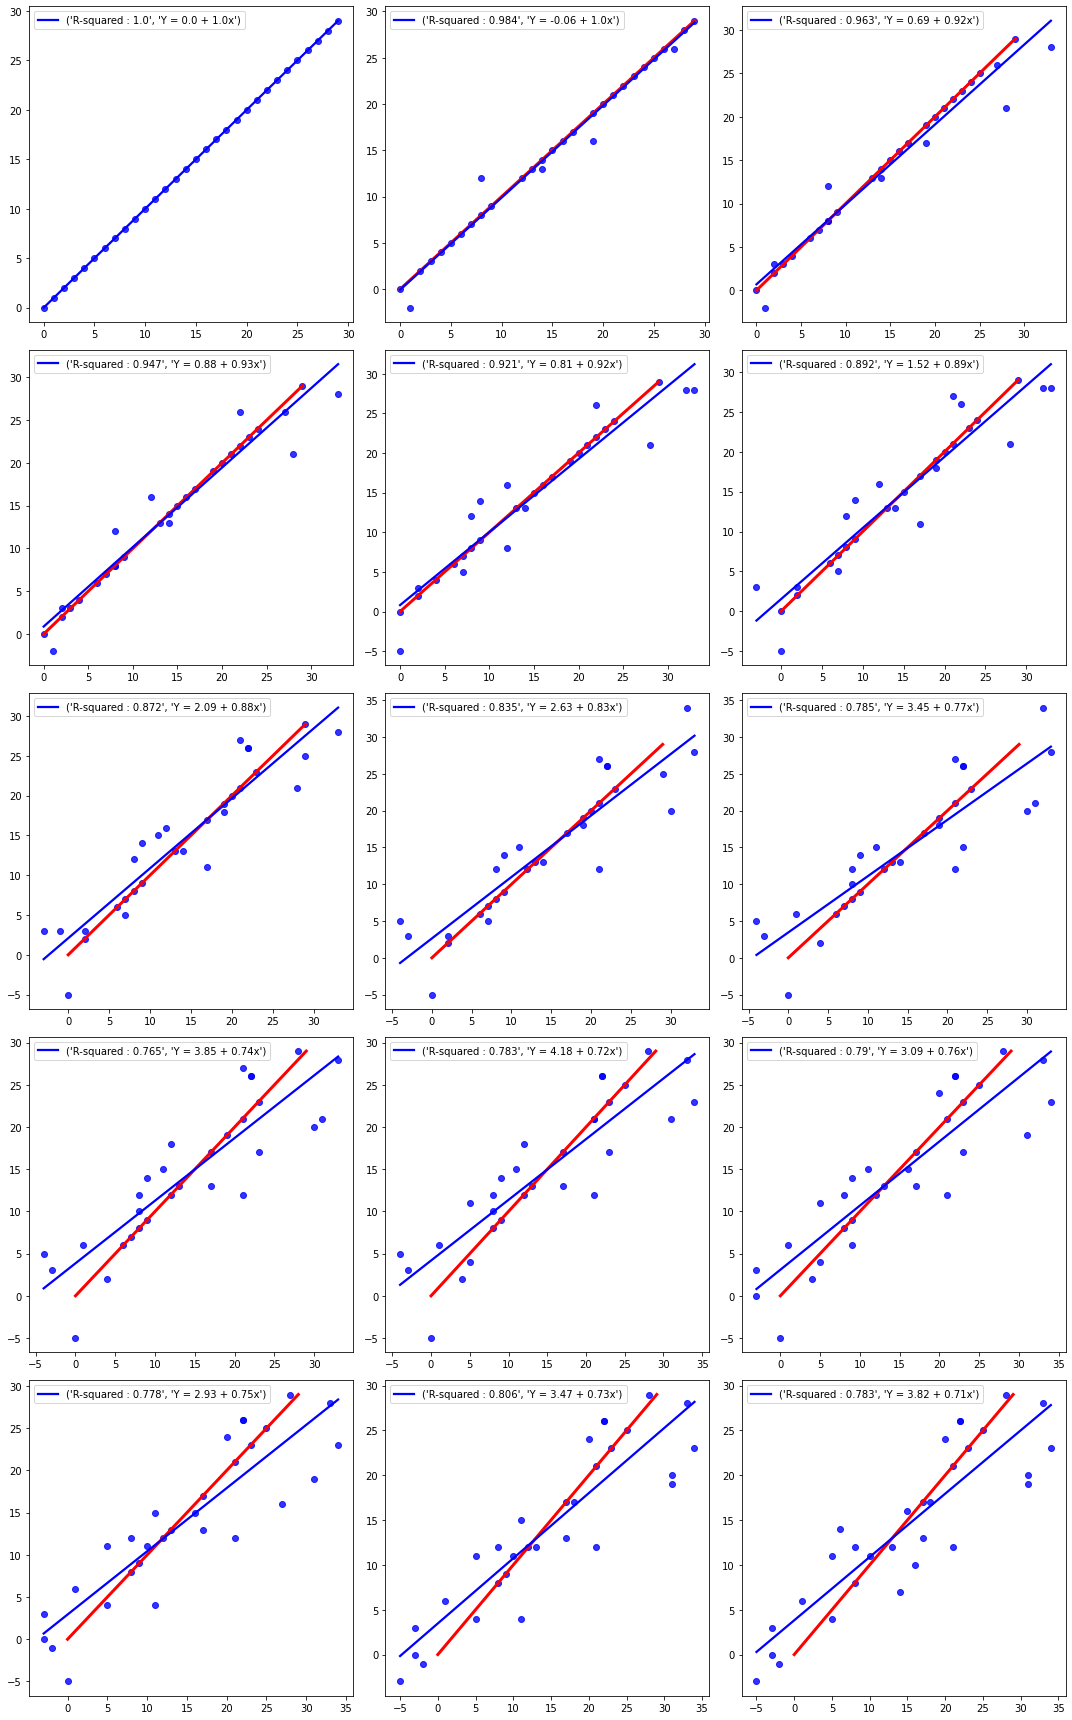

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

x = np.arange(0, 30)
x2 = np.arange(0, 30)
y = np.arange(0, 30)

fig, ax = plt.subplots(5,3, figsize=(15,24)) # toplamda 15 grafik olusturulacak

for i in range(5):
    for j in range(3):
        if i == 0 and j == 0: # ilk grafik, y=x grafigi, r-squared = 1
                              # y=x grafigi ilk grafikte mavi renkle diger grafiklerde kirmizi renk ile gosteriliyor
            regre = stats.linregress(x, y)
            b0 = regre.intercept
            b1 = regre.slope
            first_pred = b0 + b1 * x
            leg = f'R-squared : {round(regre.rvalue ** 2, 3)}'
            fonk = f'Y = {round(b0,2)} + {round(b1,2)}x'
            tota = (leg, fonk)
            
            sns.regplot(x, y, ci=None, ax=ax[i][j], color='b', line_kws={'label':tota})
                # butun grafiklerde regresyon fonksiyonunun grafigi mavi renk ile gosterilmistir
            ax[i][j].legend(loc="upper left")
            plt.tight_layout()
            
        else:
            nums = [random.randint(0, len(x)-1) for _ in range(5)] # ilk grafik haric her grafik icin 5 noktanin
                                                                   # x ve y degerleri random degistiriliyor
            for k in nums:
                for_x = random.randint(-5, 5) # x degeri icin -5 ile 5 arasindaki random bir sayi belirlenir
                for_y = random.randint(-5, 5) # y degeri icin -5 ile 5 arasindaki random bir sayi belirlenir
                x[k] += for_x # x, belirlenen random sayi ile toplanir
                y[k] += for_y # y, belirlenen random sayi ile toplanir
            regre = stats.linregress(x, y) # her bir grafik icin yeni x ve y degerleri ile yeni coefficient'lar belirlenir
            b0 = regre.intercept
            b1 = regre.slope
            leg = f'R-squared : {round(regre.rvalue ** 2, 3)}'
            fonk = f'Y = {round(b0,2)} + {round(b1,2)}x'
            tota = (leg, fonk)

            sns.lineplot(x2, first_pred, ax=ax[i][j], ci=None, lw=3, color='r')
            sns.regplot(x, y, ci=None, ax=ax[i][j], color='b', line_kws={'label':tota})
            ax[i][j].legend(loc="upper left")
            plt.tight_layout()